46.00288772583008 109.08455657958984 98.89644622802734 98.89644622802734 176.6658477783203
86.66584777832031
176.6658477783203


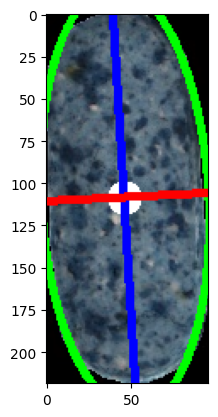

In [3]:
# reference: https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# read input
img = cv2.imread('database/shape/s4.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
ret, thresh = cv2.threshold(gray, 1, 1,0)

# find largest contour
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# fit contour to ellipse and get ellipse center, minor and major diameters and angle in degree 
ellipse = cv2.fitEllipse(big_contour)
(xc,yc),(d1,d2),angle = ellipse
print(xc,yc,d1,d1,angle)

# draw ellipse in green
result = img.copy()
cv2.ellipse(result, ellipse, (0, 255, 0), 3)

# draw circle at center
xc, yc = ellipse[0]
cv2.circle(result, (int(xc),int(yc)), 10, (255, 255, 255), -1)

# draw major axis line in red
rmajor = max(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
print(angle)
x1 = xc + math.cos(math.radians(angle))*rmajor
y1 = yc + math.sin(math.radians(angle))*rmajor
x2 = xc + math.cos(math.radians(angle+180))*rmajor
y2 = yc + math.sin(math.radians(angle+180))*rmajor
cv2.line(result, (int(x1),int(y1)), (int(x2),int(y2)), (0, 0, 255), 3)

# draw minor axis line in blue
rminor = min(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
print(angle)
x1 = xc + math.cos(math.radians(angle))*rminor
y1 = yc + math.sin(math.radians(angle))*rminor
x2 = xc + math.cos(math.radians(angle+180))*rminor
y2 = yc + math.sin(math.radians(angle+180))*rminor
cv2.line(result, (int(x1),int(y1)), (int(x2),int(y2)), (255, 0, 0), 3)

plt.imshow(result)
# plt.imshow(img)

In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
def rotate_image(image):
    # Get the height and width of the image
    h, w = image.shape[:2]

    # Define the desired size
    w_new = 400
    h_new = 400

    # Create a black image of the same size as w_new and h_new
    black = np.zeros((h_new, w_new, 3), dtype=np.uint8)

    # Copy the original image to the center of the black image
    x_offset = (w_new - w) // 2
    y_offset = (h_new - h)  // 2
    black[y_offset:y_offset+h, x_offset:x_offset+w] = image
    
    image = black
    
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img, 1, 1,0)
    
    # find largest contour
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)
    
    # fit an ellipse to the contour and get the center, axes and angle
    (xc, yc), (d1, d2), angle = cv2.fitEllipse(big_contour)
    # create a rotation matrix using the center and angle
    M = cv2.getRotationMatrix2D((xc, yc), angle, 1)
    M_opp = cv2.getRotationMatrix2D((xc, yc), angle + 180, 1)
    
    # apply the rotation matrix to the image and crop it to the ellipse size
    rotated = cv2.warpAffine(image, M, (400, 400))
    rotated_opp = cv2.warpAffine(image, M_opp, (400, 400))
        
    # return the rotated image
    return rotated, rotated_opp

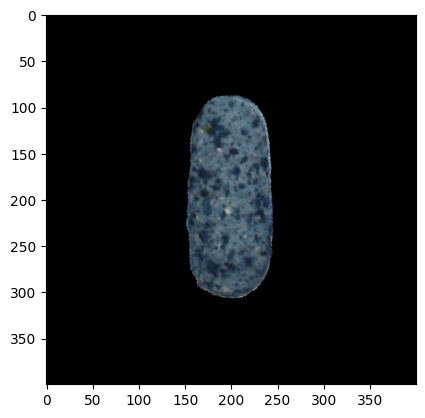

In [7]:
img = cv2.imread('database/pill_db/p5_3.jpg')
# img = cv2.imread('database/shape/s4.jpg')
img_r,_ = rotate_image(img)
plt.imshow(img_r)

In [8]:
# https://stackoverflow.com/questions/23927361/built-in-functions-available-in-opencv2-python-to-find-distance-between-to-image
img,_ = rotate_image(cv2.imread('database/pill_db/p2_1.jpg'))
template,_ = rotate_image(cv2.imread('database/pill_db/p6_3.jpg'))

result = []
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for i in range(len(methods)):
    result.append(cv2.matchTemplate(img,template,eval(methods[i])))
    print ("Method {}  : Result{}".format(methods[i],result[i]))
    

Method cv2.TM_CCOEFF  : Result[[2.2123314e+08]]
Method cv2.TM_CCOEFF_NORMED  : Result[[0.74279696]]
Method cv2.TM_CCORR  : Result[[2.3740885e+08]]
Method cv2.TM_CCORR_NORMED  : Result[[0.7495549]]
Method cv2.TM_SQDIFF  : Result[[1.9094946e+08]]
Method cv2.TM_SQDIFF_NORMED  : Result[[0.6028718]]


In [9]:
def get_axis_len(img):
    
    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold
    ret, thresh = cv2.threshold(gray, 1, 1,0)

    # find largest contour
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    # fit contour to ellipse and get ellipse center, minor and major diameters and angle in degree 
    ellipse = cv2.fitEllipse(big_contour)
    (xc,yc),(d1,d2),angle = ellipse
    
    return np.array((d1,d2))

In [12]:
# NCC Score, color score, 
from utils import get_3D_hsv_hist, compare_hist, get_hog_feature, get_size, get_mask

def normalize_list(x):
    return (x-np.min(x))/ (np.max(x)-np.min(x))

pill_ncc = []
pill_color = []
pill_hog = []
pill_hu = []
pill_size = []
pill_axis = []


for i in range(7):
    temp_ncc = []
    temp_color = []
    temp_hog = []
    temp_hu = []
    temp_size = []
    temp_axis = []
    
    temp1, temp2 = rotate_image(cv2.imread('database/pill_db/p{}_0.jpg'.format(i)))
    
    # get color histgram
    temp1_hist = get_3D_hsv_hist(temp1)
    temp2_hist = get_3D_hsv_hist(temp2)
    
    # get HoG feature
    temp1_hog = get_hog_feature(temp1)
    temp2_hog = get_hog_feature(temp2)
    
    # get mask for Hu momentum
    temp1_mask = get_mask(temp1)
    temp2_mask = get_mask(temp2)
    
    # get mask size
    temp1_size = get_size(temp1)
    
    # get mask axis
    temp1_axis = get_axis_len(temp1)
    
    for k in range(7):
        for j in range(4):
            img, _ = rotate_image(cv2.imread('database/pill_db/p{}_{}.jpg'.format(k, j+1)))
            
            # NCC score 
            ncc_1 = cv2.matchTemplate(img,temp1,cv2.TM_CCORR_NORMED)
            ncc_2 = cv2.matchTemplate(img,temp2,cv2.TM_CCORR_NORMED)
            temp_ncc.append(1-max(ncc_1, ncc_2)[0][0])
            
            # Color histgram difference (normarlized)
            img_hist = get_3D_hsv_hist(img)
            color_1 = compare_hist(img_hist,temp1_hist)
            color_2 = compare_hist(img_hist,temp2_hist)
            temp_color.append(min(color_1, color_2))
            
            # HoG
            img_hog = get_hog_feature(img)
            hog_1 = compare_hist(img_hog,temp1_hog)
            hog_2 = compare_hist(img_hog,temp2_hog)
            temp_hog.append(min(hog_1, hog_2))
            
            # Hu momentum
            img_mask = get_mask(img)
            hu_1 = cv2.matchShapes(img_mask, temp1_mask, 1, 0.0)
            hu_2 = cv2.matchShapes(img_mask, temp2_mask, 1, 0.0)
            temp_hu.append(min(hu_1,hu_2))
            
            # Size difference
            img_size = get_size(img)
            size_diff = abs(int(img_size)-int(temp1_size))
            temp_size.append(size_diff)
            
            # Axis difference
            img_axis = get_axis_len(img)
            axis_diff = compare_hist(img_axis,temp1_axis)
            temp_axis.append(axis_diff)
            
            
    pill_ncc.append(normalize_list(temp_ncc))
    pill_hog.append(normalize_list(temp_hog))
    pill_color.append(normalize_list(temp_color))
    pill_hu.append(normalize_list(temp_hu))
    pill_size.append(normalize_list(temp_size))
    pill_axis.append(normalize_list(temp_axis))
        

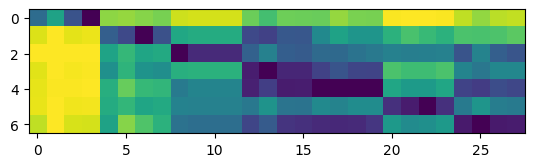

In [19]:
# Visulize the ncc score
plt.imshow(pill_ncc, cmap='viridis', interpolation='nearest')
# plt.colorbar()
plt.show()

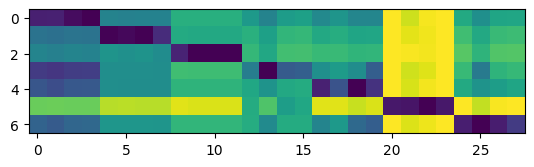

In [20]:
# Visulize the ncc score
plt.imshow(pill_color, cmap='viridis', interpolation='nearest')
# plt.colorbar()
plt.show()

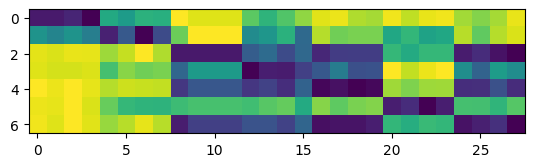

In [21]:
# Visulize the ncc score
plt.imshow(pill_hog, cmap='viridis', interpolation='nearest')
# plt.colorbar()
plt.show()

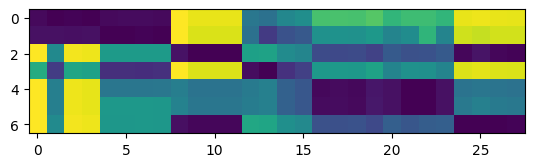

In [22]:
# Visulize the ncc score
plt.imshow(pill_hu, cmap='viridis', interpolation='nearest')
# plt.colorbar()
plt.show()

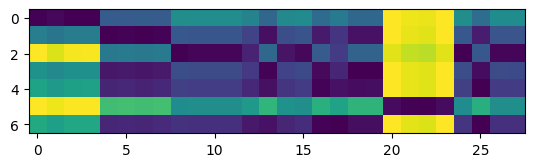

In [23]:
# Visulize the ncc score
plt.imshow(pill_size, cmap='viridis', interpolation='nearest')
# plt.colorbar()
plt.show()

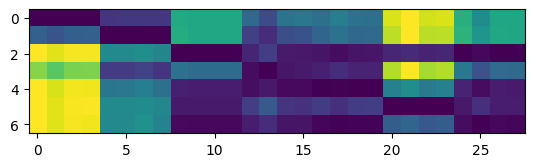

In [18]:
# Visulize the axis score
plt.imshow(pill_axis, cmap='viridis', interpolation='nearest')
# plt.colorbar()
plt.show()

In [46]:
import numpy as np

def generate_weight_matrix(n, m, gain=1):
    # Create an empty matrix of shape (n, m*n**2) filled with -1
    matrix = np.full((n, m*n), -1)

    # Loop over each row
    for i in range(n):
      # Set the m*i to m*(i+1) column of the i row to 1
      matrix[i, m*i:m*(i+1)] = gain

    # return the matrix
    return(matrix)

n = 7 # number of pill types
m = 4 # registered img per pill
k = 5 # 5 pill features

# generate weight matrix
weight = generate_weight_matrix(n=7,m=4, gain=1)

In [47]:
from IPython.display import display, Math

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))
#     return r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'

In [48]:
print_matrix(weight)

<IPython.core.display.Math object>

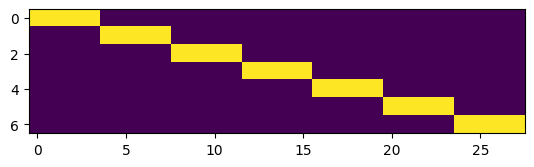

In [49]:
# Visulize the axis score
plt.imshow(weight, cmap='viridis', interpolation='nearest')
# plt.colorbar()
plt.show()

In [53]:
# Define the objective function coefficients
cost = []
for pill_feature in [pill_ncc, pill_color, pill_hog, pill_hu, pill_size]:
        temp_cost = sum(sum(np.vstack(pill_feature) * weight))
        cost.append(temp_cost) 
norm_cost = abs(cost/sum(cost))
print("cost:", norm_cost)

cost: [0.20845539 0.23003319 0.23198423 0.17678003 0.15274716]


In [39]:
i = 0
M = np.zeros((n,n*m))
for pill_feature in [pill_ncc, pill_color, pill_hog, pill_hu, pill_size]:
    M = M + np.vstack(pill_feature)*norm_cost[i]

In [ ]:
plt.imshow(M)

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

# Import linprog from scipy.optimize
from scipy.optimize import linprog

# Sum to 1
A_eq = [[1 for i in range(k)]]
b_eq = [1]


# Solve the problem using linprog
res = linprog(cost, A_eq=A_eq, b_eq=b_eq, bounds=(0,1))

# Print the optimal solution
print(res)

In [ ]:
# None linear decision making
# When to trust what features
# Some features are extremely at telling the differece between certain pills
# Voting problem

In [ ]:
def register_db():
    for k in range(7):
        ncc, color, hog, hu, size = 0, 0, 0, 0, 0
        for j in range(1):
            img, _ = rotate_image(cv2.imread('database/pill_db/p{}_{}.jpg'.format(k, j)))

            # NCC score
            ncc_1 = cv2.matchTemplate(img, temp1, cv2.TM_CCORR_NORMED)
            ncc_2 = cv2.matchTemplate(img, temp2, cv2.TM_CCORR_NORMED)
            ncc += (1 - max(ncc_1, ncc_2)[0][0])

            # Color histgram difference (normarlized)
            img_hist = get_3D_hsv_hist(img)
            color_1 = compare_hist(img_hist, temp1_hist)
            color_2 = compare_hist(img_hist, temp2_hist)
            color += (min(color_1, color_2))

            # HoG
            img_hog = get_hog_feature(img)
            hog_1 = compare_hist(img_hog, temp1_hog)
            hog_2 = compare_hist(img_hog, temp2_hog)
            hog += (min(hog_1, hog_2))

            # Hu momentum
            img_mask = get_mask(img)
            hu_1 = cv2.matchShapes(img_mask, temp1_mask, 1, 0.0)
            hu_2 = cv2.matchShapes(img_mask, temp2_mask, 1, 0.0)
            hu += (min(hu_1, hu_2))

            # Size difference
            img_size = get_size(img)
            size_diff = abs(int(img_size) - int(temp1_size))
            size += (size_diff)

In [ ]:
def pill_identify(size_filtered_mask, cost):
    registered_masks = []
    i = 0
    for ann in size_filtered_mask:
        img_cropped = cv2.imread('cuts_out/cuts_out_{}.jpg'.format(i))
        i += 1
        temp1, temp2 = rotate_image(img_cropped)

        # get color histgram
        temp1_hist = get_3D_hsv_hist(temp1)
        temp2_hist = get_3D_hsv_hist(temp2)

        # get HoG feature
        temp1_hog = get_hog_feature(temp1)
        temp2_hog = get_hog_feature(temp2)

        # get mask for Hu momentum
        temp1_mask = get_mask(temp1)
        temp2_mask = get_mask(temp2)

        # get mask size
        temp1_size = get_size(temp1)

        temp_ncc = []
        temp_color = []
        temp_hog = []
        temp_hu = []
        temp_size = []

        for k in range(7):
            ncc, color, hog, hu, size = 0, 0, 0, 0, 0
            for j in range(1):
                img, _ = rotate_image(cv2.imread('database/pill_db/p{}_{}.jpg'.format(k, j)))

                # NCC score
                ncc_1 = cv2.matchTemplate(img, temp1, cv2.TM_CCORR_NORMED)
                ncc_2 = cv2.matchTemplate(img, temp2, cv2.TM_CCORR_NORMED)
                ncc += (1 - max(ncc_1, ncc_2)[0][0])

                # Color histgram difference (normarlized)
                img_hist = get_3D_hsv_hist(img)
                color_1 = compare_hist(img_hist, temp1_hist)
                color_2 = compare_hist(img_hist, temp2_hist)
                color += (min(color_1, color_2))

                # HoG
                img_hog = get_hog_feature(img)
                hog_1 = compare_hist(img_hog, temp1_hog)
                hog_2 = compare_hist(img_hog, temp2_hog)
                hog += (min(hog_1, hog_2))

                # Hu momentum
                img_mask = get_mask(img)
                hu_1 = cv2.matchShapes(img_mask, temp1_mask, 1, 0.0)
                hu_2 = cv2.matchShapes(img_mask, temp2_mask, 1, 0.0)
                hu += (min(hu_1, hu_2))

                # Size difference
                img_size = get_size(img)
                size_diff = abs(int(img_size) - int(temp1_size))
                size += (size_diff)

            temp_ncc.append(ncc)
            temp_color.append(color)
            temp_hog.append(hog)
            temp_hu.append(hu)
            temp_size.append(size)

        score_list = normalize_list(temp_ncc) * cost[0] + normalize_list(temp_color) * cost[1] + normalize_list(temp_hog) * cost[2] + normalize_list(temp_hu) * cost[3] + normalize_list(temp_size) * cost[4]
        # print(score_list)
        score_list = score_list.tolist()

        score = min(score_list)
        index = score_list.index(score)
        ann['score'] = score
        ann['index'] = index
        registered_masks.append(ann)
    return registered_masks

In [ ]:
def register_color_hist():
    img_hist_list = []
    for k in range(7):
            tmp = []
            for j in range(1):
                img, _ = rotate_image(cv2.imread('database/pill_db/p{}_{}.jpg'.format(k, j)))
                img_hist = get_3D_hsv_hist(img)
                tmp.append(img_hist)
            img_hist_list.append(tmp)
    return img_hist_list

    

In [21]:
img_hist_list = register_color_hist()
img_hist_list[0][0]

array([[[9.7988125e-01, 1.4375000e-04, 1.6875000e-04, 8.1250000e-05,
         3.1250000e-05, 1.8750000e-05, 0.0000000e+00, 0.0000000e+00],
        [4.3750000e-05, 9.3750000e-05, 1.6250000e-04, 1.3125000e-04,
         3.1250000e-05, 5.6250000e-05, 2.5000000e-05, 0.0000000e+00],
        [5.0000000e-05, 8.7500000e-05, 3.7500000e-05, 3.1250000e-05,
         1.2500000e-05, 6.2500000e-06, 0.0000000e+00, 0.0000000e+00],
        [1.8750000e-05, 3.7500000e-05, 6.2500000e-06, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.0000000e-05, 0.0000000e+00, 6.2500000e-06, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [2.5000000e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [8.7500000e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [6.1250000e-04, 0.0

In [22]:
def register_dbimg():
    img_list = []
    for k in range(7):
            tmp = []
            for j in range(1):
                img, _ = rotate_image(cv2.imread('database/pill_db/p{}_{}.jpg'.format(k, j)))
                tmp.append(img)
            img_list.append(tmp)
    return img_list